In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [5, 5]

from ir_dataset import IRDataSet

# Handy function for visualization
def sequence_to_video(sequence):
    frames = []
    fig = plt.figure(figsize=(3.2,2.4))
    for img in sequence:
        frames.append([plt.imshow(img, animated=True)])

    ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
    plt.close()
    return ani.to_html5_video()

def iterator_to_numpy_array(raw):
    return np.array(*[list(raw)])

# Blob Experiments

In [3]:
import cv2
import numpy as np

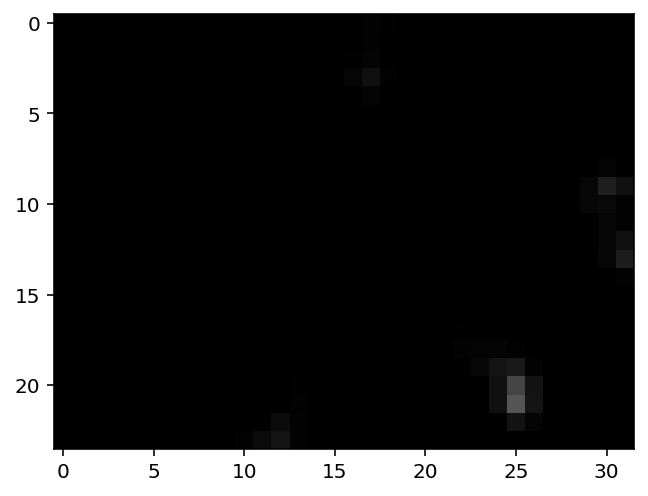

In [46]:
# Import the Data Set
data = IRDataSet()

# Get an iterator
sequence_iterator = data.get_sequences_for_label(label=4, limit=1)
# Only get the first element
first_sequence = next(sequence_iterator)
# Extract the image from the frame tuples (sequence_id, photo_id, capture_time, sensor_id, image)
sample_sequence = [x[4] for x in first_sequence]
sample_image = sample_sequence[5]
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 20
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 5
params.maxArea = 15

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.6

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.6

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

params.blobColor = 255

detector = cv2.SimpleBlobDetector_create(params)
detection_sequence = detector.detect(sample_sequence)

s_d = detector.detect(sample_image)
a_i = cv2.drawKeypoints(sample_image, s_d, None, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(a_i)

annotated_sequence = [
    cv2.drawKeypoints(im.astype(np.uint8), keypoints, None, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    for im, keypoints in zip(sample_sequence, detection_sequence)
]

# Showtime!
HTML(sequence_to_video(annotated_sequence))